<a href="https://colab.research.google.com/github/sabnadk/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-contrib-python==4.4.0.44

ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==4.4.0.44 (from versions: 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78)
ERROR: No matching distribution found for opencv-contrib-python==4.4.0.44


In [1]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from base64 import b64decode, b64encode
import PIL
import io

#akses drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Feature Matching**

In [ ]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

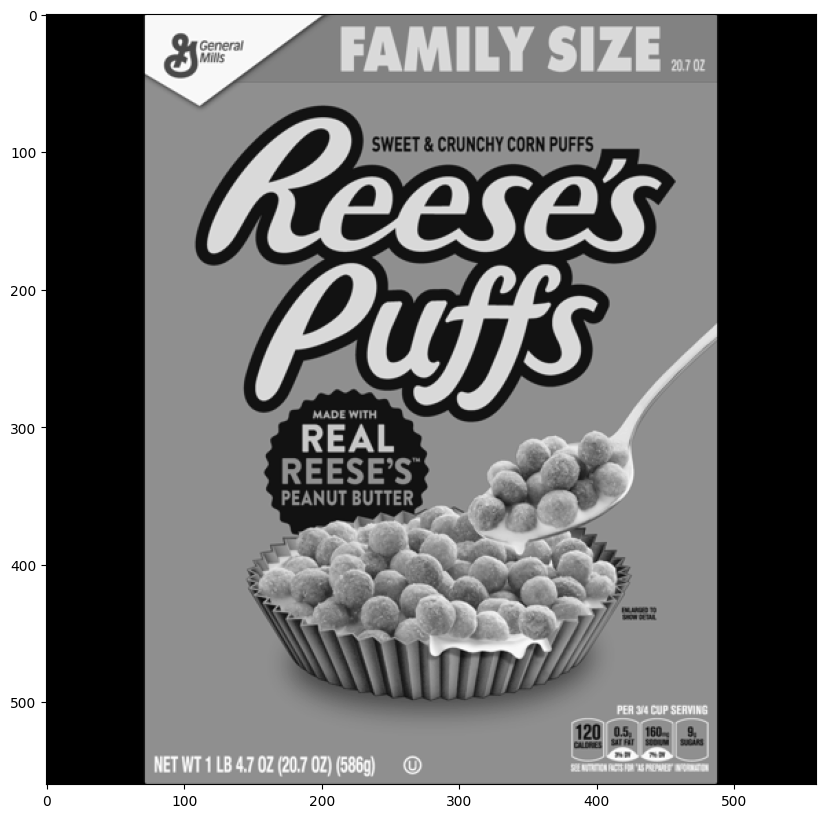

In [ ]:
reeses = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/facedet/reeses_puffs.png',0)
display(reeses)

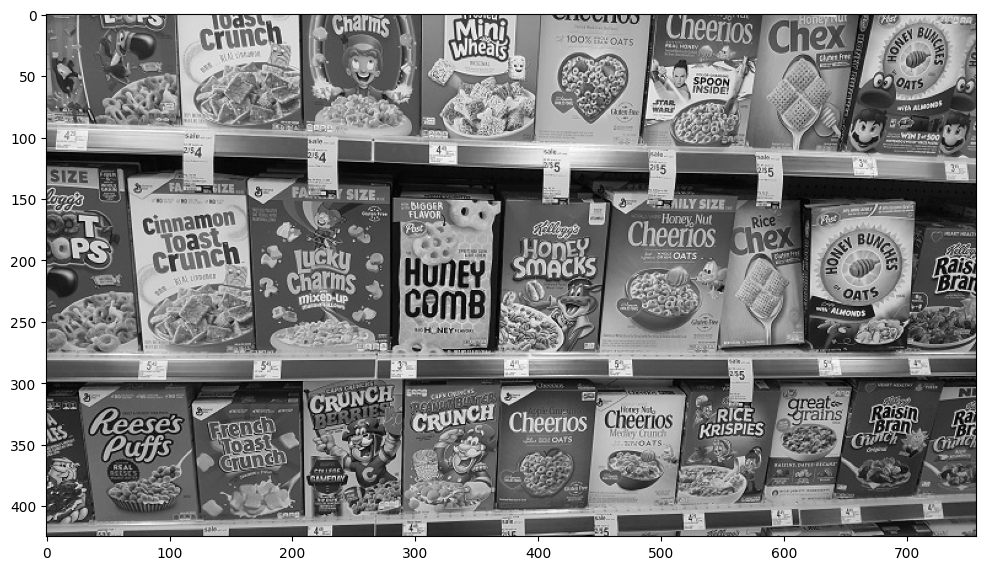

In [ ]:
cereals = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/facedet/many_cereals.jpg',0)
display(cereals)

In [ ]:
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)
bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck = True)
matches = bf.match(des1,des2)
single_match = matches[0]
single_match.distance

71.0

In [ ]:
len(matches)

139

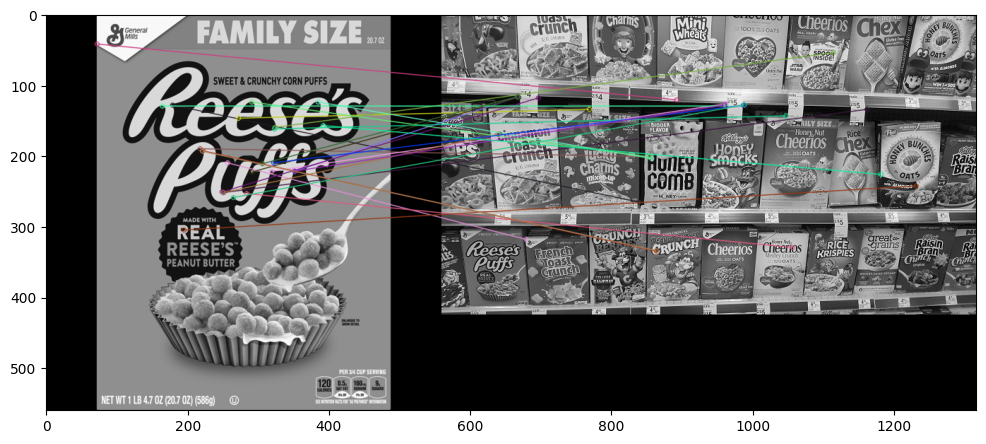

In [ ]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

In [ ]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals, None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

#Makin kecil jarak makin cocok
#ratio match1 < 75% Match2
for match1,match2 in matches:
  #jika jarak match1 lebih kecil dari jarak 75% match2
  #descriptor disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [ ]:
len(matches)

1501

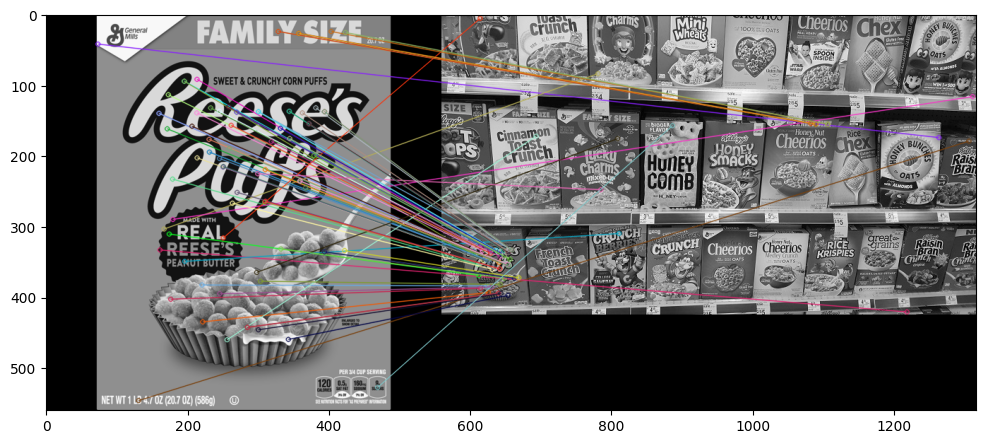

In [ ]:
sift_matches = cv.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches)

# **Face Detection**

https://en.wikipedia.org/wiki/Solvay_Conference

In [ ]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/haarcascades/haarcascade_frontalface_alt2.xml')


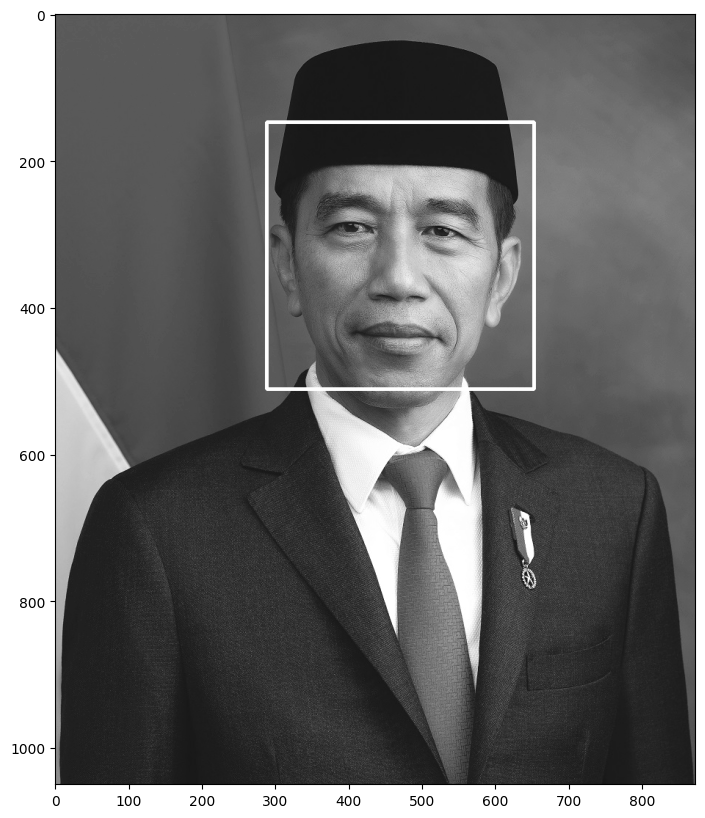

In [ ]:
jokowi = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/facedet/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

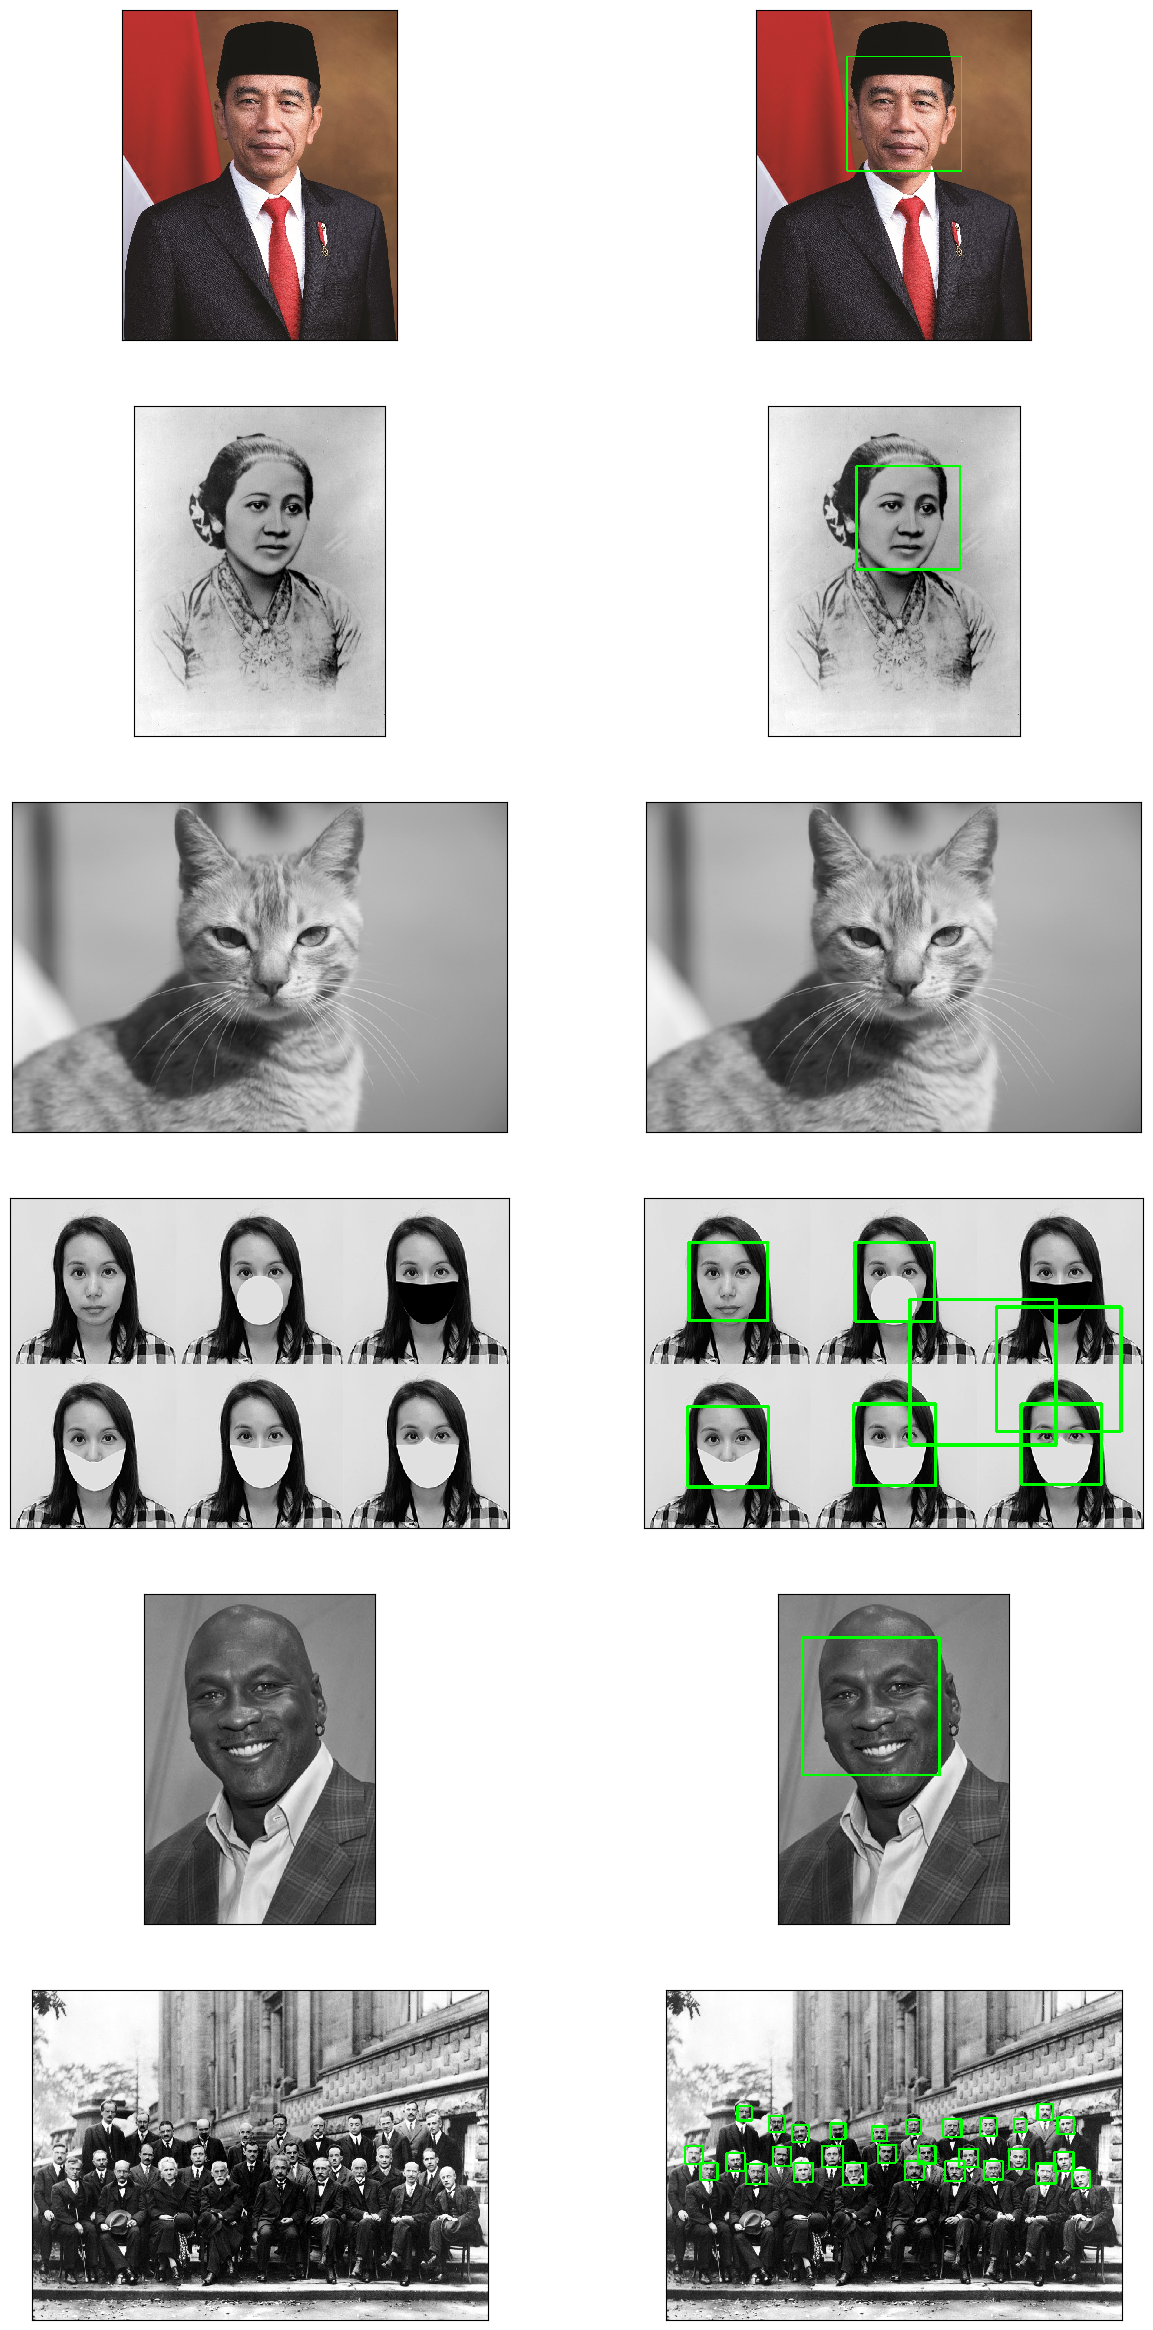

In [ ]:
def detek_wajah(img):
  img_asli = img.copy()
  img_wajah = cv.cvtColor(img_asli,cv.COLOR_RGB2GRAY)
  roi_wajah = cascade_wajah.detectMultiScale(img_wajah)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(img_asli,(x,y),(x+w,y+h),(0,255,0),3)
  return img_asli

jokowi = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/facedet/jokowi.jpg')
kartini = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/facedet/kartini.jpg',0)
kucing = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/facedet/mycat.jpg',0)
mask = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/facedet/mask.png',0)
mjordan = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/facedet/mjordan.jpg',0)
solvay = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/facedet/solvayconf.jpg',0)

jokowi = cv.cvtColor(jokowi,cv.COLOR_BGR2RGB)
kartini = cv.cvtColor(kartini,cv.COLOR_BGR2RGB)
kucing = cv.cvtColor(kucing,cv.COLOR_BGR2RGB)
mask = cv.cvtColor(mask,cv.COLOR_BGR2RGB)
mjordan = cv.cvtColor(mjordan,cv.COLOR_BGR2RGB)
solvay = cv.cvtColor(solvay,cv.COLOR_BGR2RGB)
hasil1 = detek_wajah(jokowi)
hasil2 = detek_wajah(kartini)
hasil3 = detek_wajah(kucing)
hasil4 = detek_wajah(mask)
hasil5 = detek_wajah(mjordan)
hasil6 = detek_wajah(solvay)

images = [jokowi, hasil1, kartini, hasil2, kucing, hasil3, mask, hasil4, mjordan, hasil5, solvay, hasil6]

plt.figure(figsize = (15,30))
for i in range(len(images)):
  plt.subplot(6,2,i+1),plt.imshow(images[i], interpolation='nearest')
  plt.xticks([]),plt.yticks([])
plt.show()

**DOG Detection**

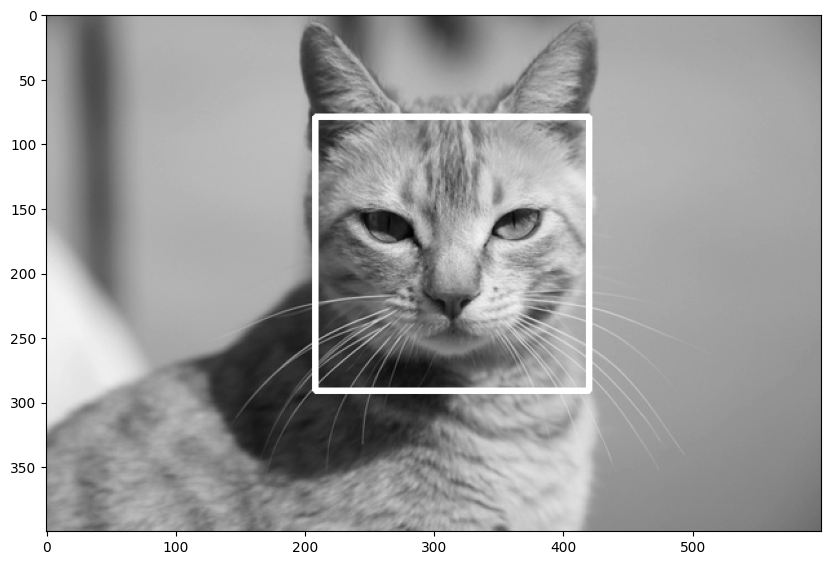

In [ ]:
cascade_kucing = cv.CascadeClassifier('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/haarcascades/haarcascade_frontalcatface_extended.xml')

kucing=[]
kucing = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/facedet/mycat.jpg',0)
roi_kucing = cascade_kucing.detectMultiScale(kucing)
for(x,y,w,h) in roi_kucing:
  cv.rectangle(kucing,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(kucing, cmap='gray')

# **Eye Detection**

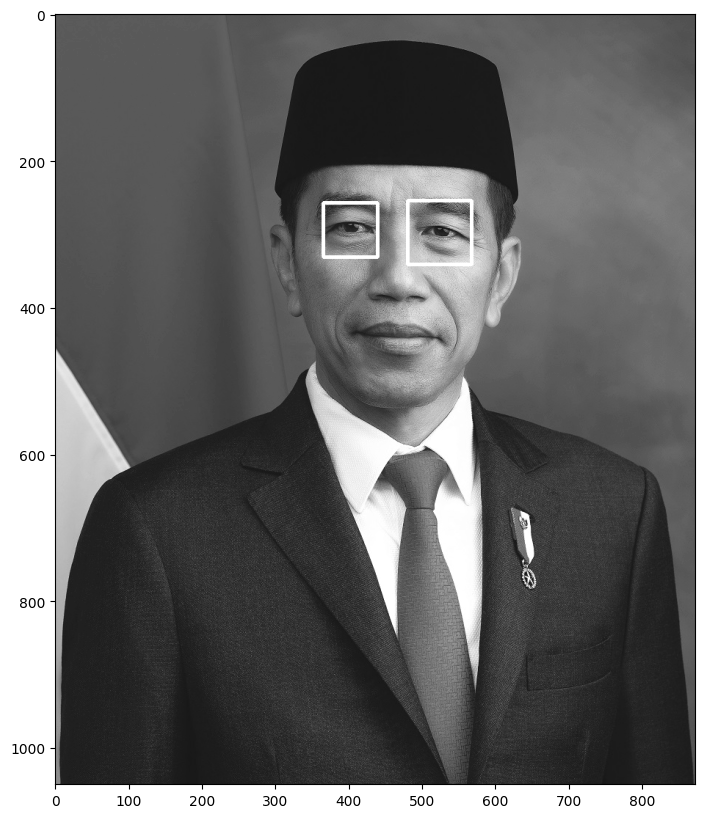

In [ ]:
cascade_mata = cv.CascadeClassifier('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/haarcascades/haarcascade_eye.xml')

jokowi=[]
jokowi = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/facedet/jokowi.jpg',0)
roi_mata = cascade_mata.detectMultiScale(jokowi)
for(x,y,w,h) in roi_mata:
  cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

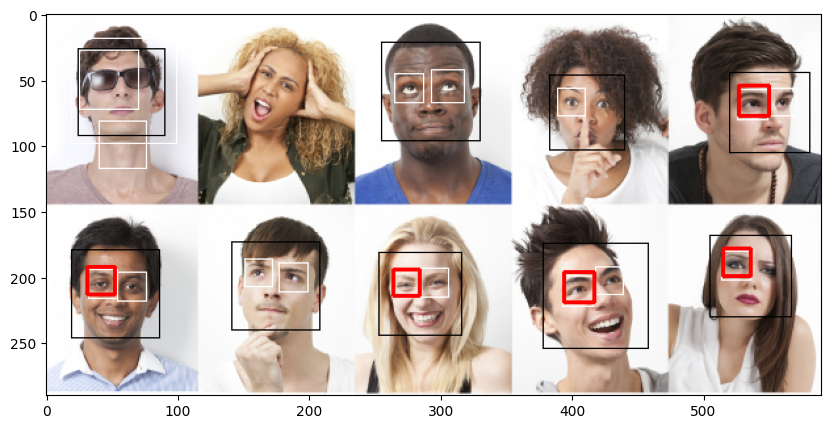

In [ ]:
from matplotlib.colors import ColorConverter
cascade_mata = cv.CascadeClassifier('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/haarcascades/haarcascade_eye.xml')
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml')
cascade_mata_kanan = cv.CascadeClassifier('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/haarcascades/haarcascade_righteye_2splits.xml')
ppl=[]
ppl = plt.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/facedet/people.jpg',1)

roi_mata = cascade_mata.detectMultiScale(ppl)
roi_wajah = cascade_wajah.detectMultiScale(ppl)
roi_smile = cascade_mata_kanan.detectMultiScale(ppl)
for(x,y,w,h) in roi_mata:
  cv.rectangle(ppl,(x,y),(x+w,y+h),(255,255,255),1)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(ppl,(x,y),(x+w,y+h),(0,0,0),1)
for(x,y,w,h) in roi_smile:
  cv.rectangle(ppl,(x,y),(x+w,y+h),(255,0,0),2)
plt.figure(figsize = (10,10))
plt.imshow(ppl)

# **Face Tracking**

In [2]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

  # function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [3]:
# JavaScript to properly create our live video stream using our webcam as input
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

<IPython.core.display.Javascript object>

(480, 640)
Saved to sabna.jpg


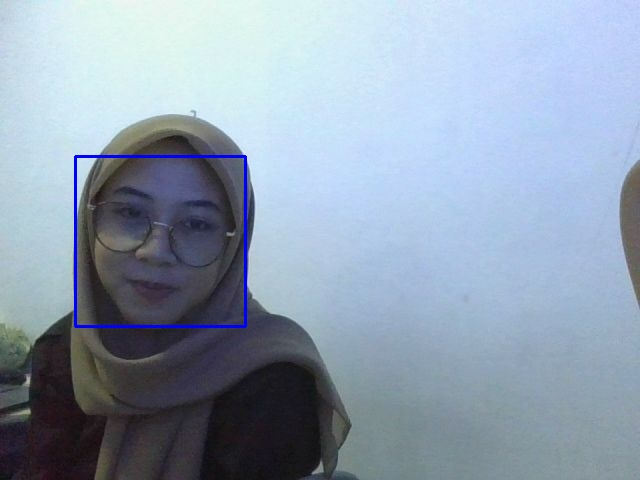

<IPython.core.display.Javascript object>

In [11]:
# 5. Face tracking
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

  # function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
    # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml')
def take_photo(filename='zalna.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

    # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

try:
  filename = take_photo('sabna.jpg')
  print('Saved to {}'.format(filename))
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
       }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

# **Blurry Face**

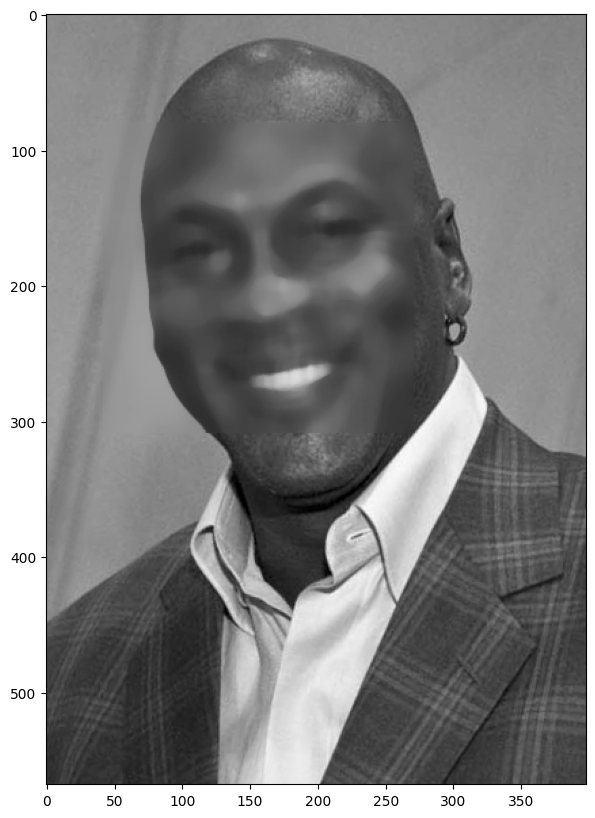

In [ ]:
mjordan = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/facedet/mjordan.jpg',0)
copy_wajah = mjordan.copy()

roi_wajah = cascade_wajah.detectMultiScale(mjordan)

for(x,y,w,h) in roi_wajah:
  copy_wajah = copy_wajah[y:y+h,x:x+w]
  blur_wajah = cv.medianBlur(copy_wajah,15)
  mjordan[y:y+h,x:x+w] = blur_wajah
plt.figure(figsize = (10,10))
plt.imshow(mjordan, cmap='gray')



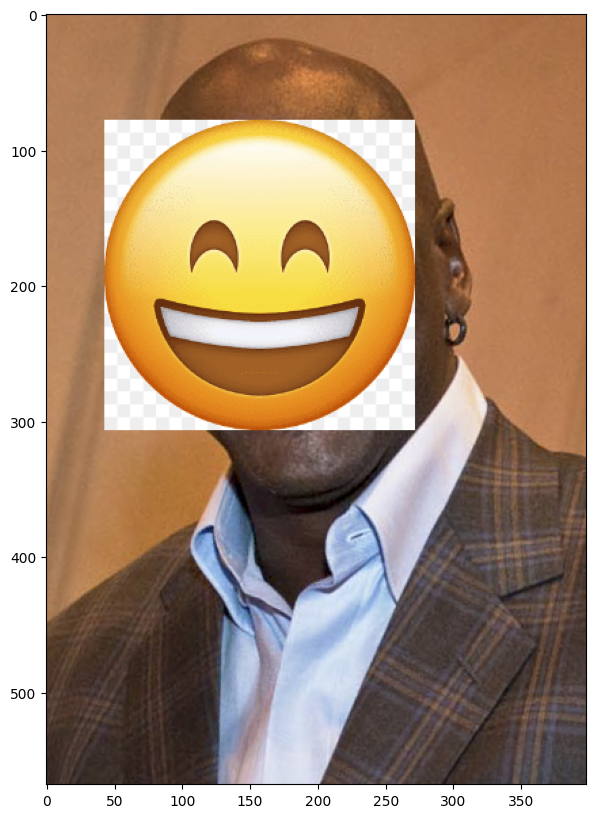

In [ ]:
mjordan = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/facedet/mjordan.jpg',1)
mjordan = cv.cvtColor(mjordan,cv.COLOR_BGR2RGB)
copy_wajah = mjordan.copy()
smile = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/facedet/smile.png',1)
smile = cv.cvtColor(smile,cv.COLOR_BGR2RGB)

roi_wajah = cascade_wajah.detectMultiScale(mjordan)

for(x,y,w,h) in roi_wajah:
  copy_wajah = copy_wajah[y:y+h,x:x+w]
  # blur_wajah = cv.medianBlur(copy_wajah,15)
  smile_copy = cv.resize(smile, (w, h))
  mjordan[y:y+h,x:x+w] = smile_copy
plt.figure(figsize = (10,10))
plt.imshow(mjordan, cmap='gray')

Segmentasi Karakter pada KTP

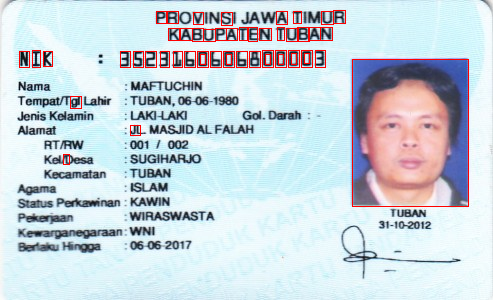

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # for image display
# Baca gambar KTP
ktpImage = cv2.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/KTP/ktp4.png')

# Ubah gambar menjadi skala abu-abu untuk deteksi tepi
gray = cv2.cvtColor(ktpImage, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # (5, 5) adalah ukuran kernel Gaussian, dan 0 adalah deviation

# Thresholding untuk membuat gambar biner
ret, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Deteksi tepi menggunakan Canny


# Temukan kontur pada gambar tepi
contours,  hierarchy= cv2.findContours(thresholded, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktpImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
      cv.rectangle(ktpImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Tampilkan gambar dengan kontur

cv2_imshow(ktpImage)

In [ ]:
ktp_crop = ktpImage[50:70, 115:330]
cv2_imshow(ktp_crop)

Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya gunakan source code di bawah ini untuk proses persiapan untuk training.


In [ ]:
import os
import tqdm
import cv2
import random
import numpy as np
import pickle

# Direktori data training
DATADIR = "dataset/training"
dirs = []

training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
    dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
    path = os.path.join(DATADIR, char_name)
    class_number = dirs.index(char_name)
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(data_dir_testing, car, char_image), cv2.IMREAD_ANYCOLOR)
            new_array = cv2.resize(img_array, (width, height))
            training_data.append([new_array, class_number])
        except Exception as e:
            pass

random.shuffle(training_data)
X = []
Y = []

for feature, label in training_data:
    X.append(feature)
    Y.append(label)

X = np.array(X).reshape(-1, width, height, 1)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()


FileNotFoundError: ignored